# Tutorial on parsing your own Rosetta .sc (score) file

This notebook parses your score file that you outputted from Rosetta, you will use `Jupyter` notebook, `pandas`, and `seaborn` to analyze data on your mutational scans.


## Import `Python` modules

In [1]:
import numpy as np # You can make nicknames for the python modules you import!
import pandas as pd # Now, you don't have to type 'pandas' every time you use pandas module, you can just type 'pd'!
import os

# Import matplotlib and use the "inline" magic to easily
# display plots within the notebook
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

# Import seaborn and change a few global variables to
# alter the aesthetic of the below plots and 
import seaborn as sns
sns.set(
    font_scale=1.5, # make the font larger; default is pretty small
    style='ticks', # make the background white with black lines
    palette='colorblind' # a color palette that is colorblind friendly!
)

## Update your `file_location` on the digs to access your filename 

In this case, you will be directing this path on the digs to **just before** your *output* folder 
from the filterscan protocol you did last week

In [2]:
file_location = "."

## Let's create your scorefile now:

In [3]:
#Make list of input score files, asterisk is wildcard character
score_files=glob(f'{file_location}/output/*/scores/*.log')

#Create for loop going through each score file iteratively, where i is an index placeholder
score_term = []
for i in score_files:
    #open score file and read lines, which turns each line into member in a list
    score_file=open(i).readlines()
    
    #Extracting values and removing whitespace, each value is a member of a list
    for line in score_file: 
        score_term.append(line.split())

In [4]:
#Creates pandas data frame for each plotting and value manipulation from the score_term list
scores_df = pd.DataFrame(score_term, columns = ['res_num', 'old_aa', 'new_aa', 'score_value'])
scores_df['score_value'] = pd.to_numeric(scores_df['score_value'])
scores_df['res_num'] = pd.to_numeric(scores_df['res_num'])
#scores_df['res_num'] = pd.to_numeric(scores_df['res_num'])+1 --> fix for sidney's number
print(type(scores_df['score_value']))

<class 'pandas.core.series.Series'>


## Now let's create a plot of scores for each mutation made on each residue position 

Let's first do this by residue position that was mutated

In [5]:
# make a list of all residue positions that we scanned
mut_resis=scores_df.res_num.unique()

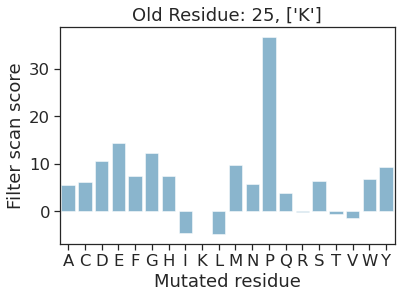

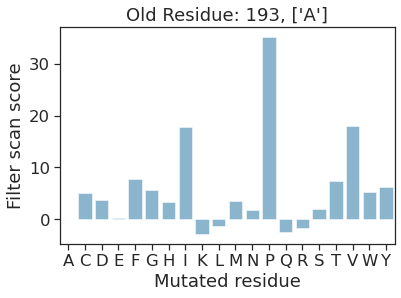

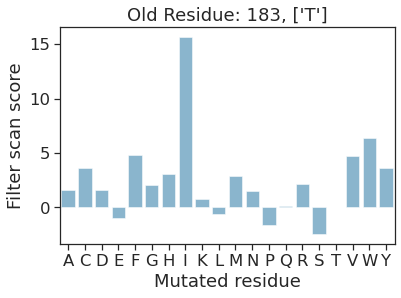

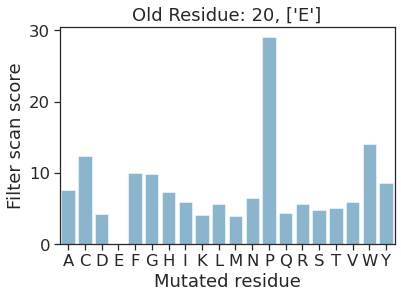

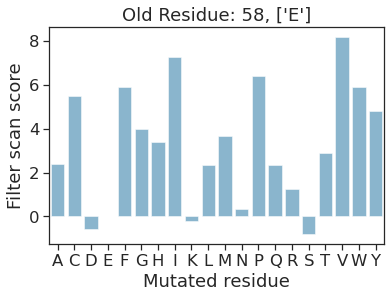

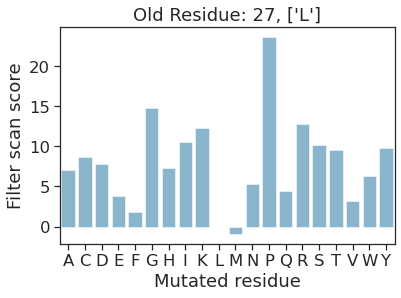

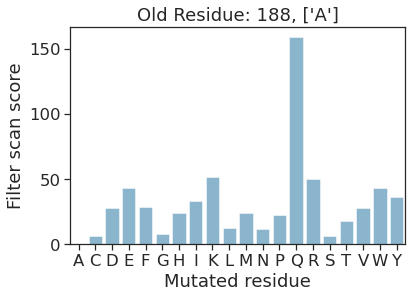

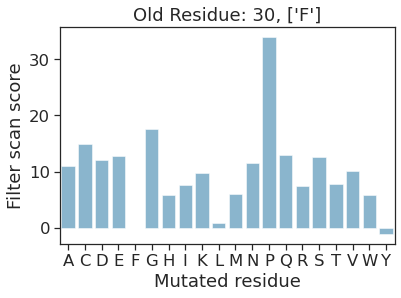

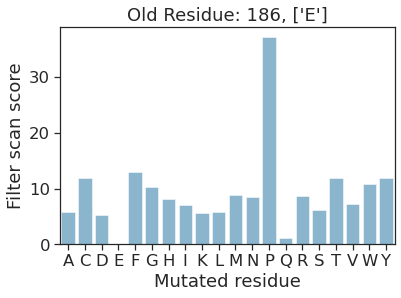

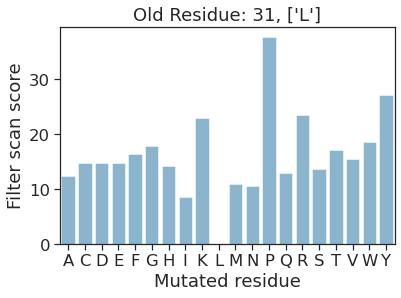

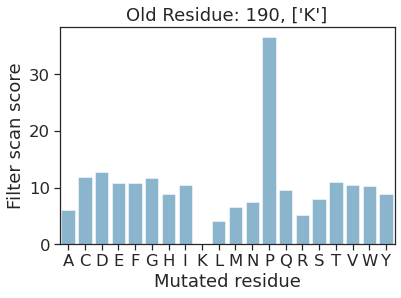

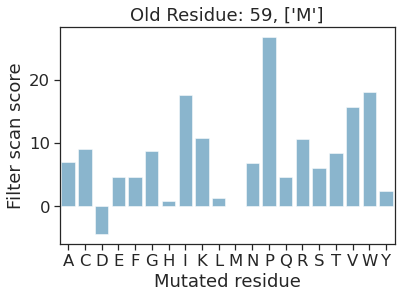

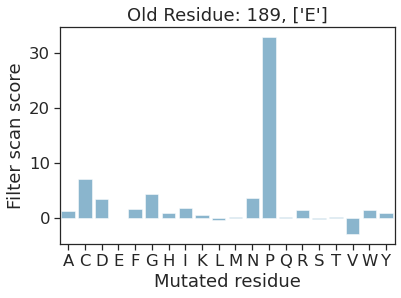

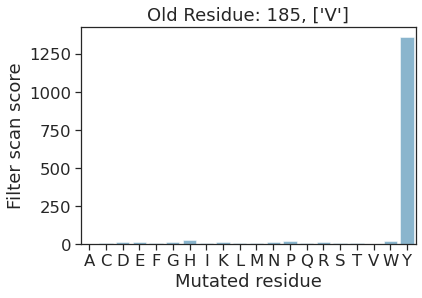

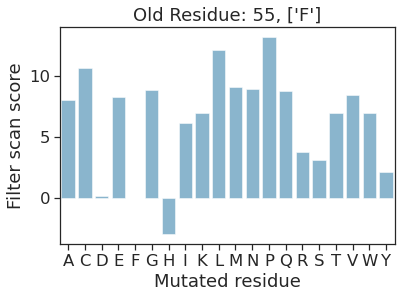

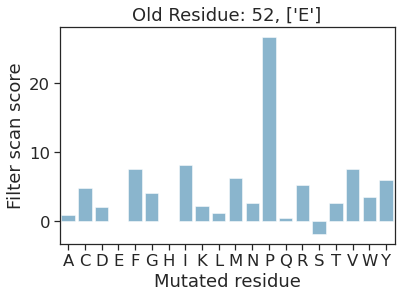

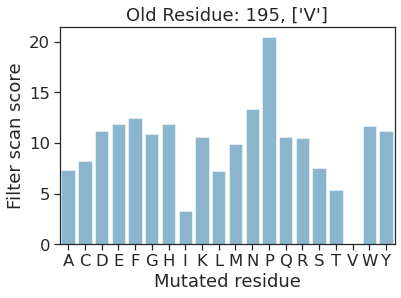

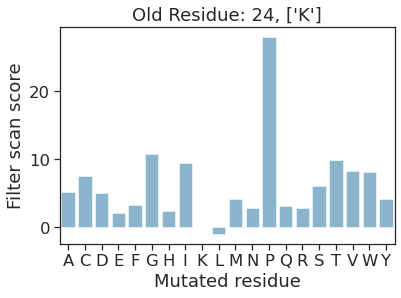

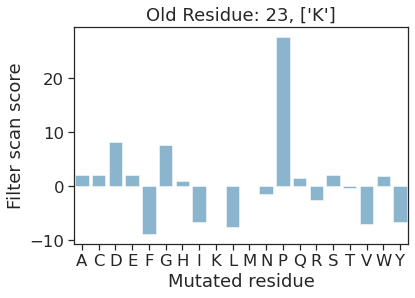

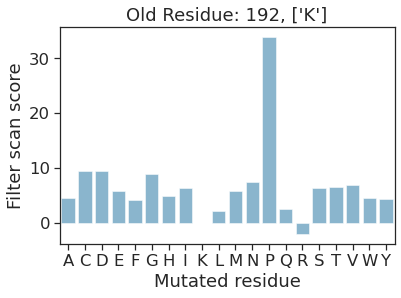

In [6]:
for res_num in mut_resis:
    plot_df = scores_df[scores_df['res_num'] == res_num]
#    res_num = res_num+1  -> fix for sidney
    old_aa = plot_df.old_aa.unique()
    plt.figure()
    sns.barplot(x = 'new_aa', y = 'score_value', data = plot_df, color='b', alpha=0.5)
    #plt.legend(loc='upper right')
    plt.ylabel("Filter scan score")
    plt.xlabel("Mutated residue")  
    plt.title(f'Old Residue: {res_num}, {old_aa}')

## We can also plot our score values for each residue position in one giant plot in the form of a heat map

In [7]:
## First we'll rearrange our dataframe so that the residue numbers are the rows and each potential amino acid are the columns and the score_value occupies the middie
pivot_scores = scores_df.pivot(index='res_num',columns='new_aa')['score_value']

Text(0.5, 43.5, 'Mutated Amino Acid')

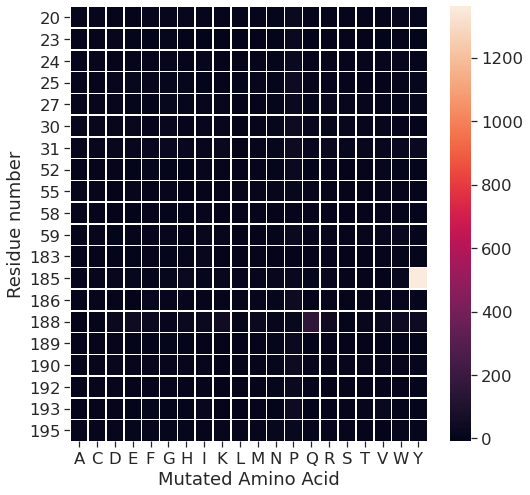

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_scores, linewidths=.5)
plt.ylabel('Residue number')
plt.xlabel('Mutated Amino Acid')

## Now let's talk about what these mean: 

In the cell below, describe what the following score terms show in your plots

What does a filter scan score < 0 mean? What about > 0? or = 0?



Which residue positions are more readily mutated? Which of these mutations are more favorable mutations? 